In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt

import pandas_market_calendars as mcal


In [7]:
nyse_dates = mcal.get_calendar('NYSE')
nyse_dates = list(nyse_dates.valid_days(start_date='2022-01-01', end_date='2030-02-12'))
nyse_dates = [dt.date() for dt in nyse_dates]

nyse_dates

[datetime.date(2022, 1, 3),
 datetime.date(2022, 1, 4),
 datetime.date(2022, 1, 5),
 datetime.date(2022, 1, 6),
 datetime.date(2022, 1, 7),
 datetime.date(2022, 1, 10),
 datetime.date(2022, 1, 11),
 datetime.date(2022, 1, 12),
 datetime.date(2022, 1, 13),
 datetime.date(2022, 1, 14),
 datetime.date(2022, 1, 18),
 datetime.date(2022, 1, 19),
 datetime.date(2022, 1, 20),
 datetime.date(2022, 1, 21),
 datetime.date(2022, 1, 24),
 datetime.date(2022, 1, 25),
 datetime.date(2022, 1, 26),
 datetime.date(2022, 1, 27),
 datetime.date(2022, 1, 28),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 2, 3),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 22

In [8]:
def next_market_day(date):
    while date.date() not in nyse_dates:
        date += datetime.timedelta(days=1)
    return date

In [9]:
df = pd.read_excel("WIW Data.xlsx")
# df = df.iloc[:, :-3]


df


,Ticker (Equities/ETFs only),"Position (Long = 1, Short = -1)",Entry Date,Exit Date,"Negative Alumni Response (No response/not negative = 0, Negative = 1)"
0,SIX,-1,2022-11-06,2023-04-06,0
1,DISH,-1,2022-11-06,2023-11-06,0
2,PLNT,1,2022-11-08,2023-05-08,0
3,MMM,-1,2022-11-08,2023-01-08,0
4,NFLX,-1,2022-11-09,2023-05-09,1
...,...,...,...,...,...
190,TMUS,1,2023-11-09,2024-11-09,0
191,TSM,1,2023-11-09,2024-11-09,0
192,SBUX,-1,2023-11-11,2023-12-26,0
193,NOW,1,2023-11-13,2024-02-13,0


In [10]:
df.head()

,Ticker (Equities/ETFs only),"Position (Long = 1, Short = -1)",Entry Date,Exit Date,"Negative Alumni Response (No response/not negative = 0, Negative = 1)"
0,SIX,-1,2022-11-06,2023-04-06,0
1,DISH,-1,2022-11-06,2023-11-06,0
2,PLNT,1,2022-11-08,2023-05-08,0
3,MMM,-1,2022-11-08,2023-01-08,0
4,NFLX,-1,2022-11-09,2023-05-09,1


In [35]:
def update_exit_date(row):
    if row['Exit Date'] > datetime.datetime(2024, 2, 9) and (row['Exit Date'] - row['Entry Date']).days >= 180:
        return datetime.datetime(2024, 2, 9)
    else:
        return row['Exit Date']

df = df.dropna()
df = df[df['Exit Date'] <= datetime.datetime(2024, 6, 1)]
df['Exit Date'] = df.apply(update_exit_date, axis=1)

df = df[df['Exit Date'] <= datetime.datetime(2024, 2, 9)]


# Step 3: Convert the date column to datetime if it's not already
df["Entry Date"] = df["Entry Date"].apply(next_market_day)
df["Exit Date"] = df["Exit Date"].apply(next_market_day)

df = df[df['Exit Date'] > df['Entry Date']]

unique_symbols = df['Ticker (Equities/ETFs only)'].unique()
unique_symbols


TypeError: 'module' object is not callable

In [12]:
stock_history = {}

start_date = '2022-01-01'
end_date = '2024-02-10'

for symbol in unique_symbols:
    print(symbol)
    stock = yf.download(symbol, start=start_date, end=end_date)

    if len(stock > 0):
        stock.index = stock.index.date
        stock_history[symbol] = stock


SIX
[*********************100%%**********************]  1 of 1 completed
DISH
[*********************100%%**********************]  1 of 1 completed
PLNT
[*********************100%%**********************]  1 of 1 completed
MMM
[*********************100%%**********************]  1 of 1 completed
NFLX
[*********************100%%**********************]  1 of 1 completed
RKLB
[*********************100%%**********************]  1 of 1 completed
FIVE
[*********************100%%**********************]  1 of 1 completed
EL
[*********************100%%**********************]  1 of 1 completed
ORLY
[*********************100%%**********************]  1 of 1 completed
RUN
[*********************100%%**********************]  1 of 1 completed
VECO
[*********************100%%**********************]  1 of 1 completed
UHS
[*********************100%%**********************]  1 of 1 completed
V
[*********************100%%**********************]  1 of 1 completed
RTX
[*********************100%%****************


1 Failed download:
['NUVA']: Exception('%ticker%: No timezone found, symbol may be delisted')



TGLS
[*********************100%%**********************]  1 of 1 completed
ELF
[*********************100%%**********************]  1 of 1 completed
MANU
[*********************100%%**********************]  1 of 1 completed
BIDU
[*********************100%%**********************]  1 of 1 completed
RACE
[*********************100%%**********************]  1 of 1 completed
RBLX
[*********************100%%**********************]  1 of 1 completed
VRRM
[*********************100%%**********************]  1 of 1 completed
RH
[*********************100%%**********************]  1 of 1 completed
FARO
[*********************100%%**********************]  1 of 1 completed
DVN
[*********************100%%**********************]  1 of 1 completed
MAR
[*********************100%%**********************]  1 of 1 completed
ONON
[*********************100%%**********************]  1 of 1 completed
GOLF
[*********************100%%**********************]  1 of 1 completed
EA
[*********************100%%************


1 Failed download:
['FFZ3']: Exception('%ticker%: No timezone found, symbol may be delisted')



CMBX
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['CMBX']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-02-10)')



DME
[*********************100%%**********************]  1 of 1 completed



1 Failed download:
['DME']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-01-01 -> 2024-02-10)')


DE
[*********************100%%**********************]  1 of 1 completed
WFC
[*********************100%%**********************]  1 of 1 completed
ADSK
[*********************100%%**********************]  1 of 1 completed
ICE:DXY
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['ICE:DXY']: Exception('%ticker%: No timezone found, symbol may be delisted')



SHOP
[*********************100%%**********************]  1 of 1 completed
MU
[*********************100%%**********************]  1 of 1 completed
TPC
[*********************100%%**********************]  1 of 1 completed
LUV
[*********************100%%**********************]  1 of 1 completed
WTI
[*********************100%%**********************]  1 of 1 completed
VLD
[*********************100%%**********************]  1 of 1 completed
U
[*********************100%%**********************]  1 of 1 completed
AMZN
[*********************100%%**********************]  1 of 1 completed
UBER
[*********************100%%**********************]  1 of 1 completed
CROX
[*********************100%%**********************]  1 of 1 completed
ALGN
[*********************100%%**********************]  1 of 1 completed
PLTR
[*********************100%%**********************]  1 of 1 completed
AAPL
[*********************100%%**********************]  1 of 1 completed
TSN
[*********************100%%***************

In [13]:
stock_history['AAPL']

,Open,High,Low,Close,Adj Close,Volume
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724548,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723587,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840240,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100
...,...,...,...,...,...,...
2024-02-05,188.149994,189.250000,185.839996,187.679993,187.440811,69668800
2024-02-06,186.860001,189.309998,186.770004,189.300003,189.058762,43490800
2024-02-07,190.639999,191.050003,188.610001,189.410004,189.168625,53439000
2024-02-08,189.389999,189.539993,187.350006,188.320007,188.080017,40962000


In [14]:
spy_data = pd.read_csv("SPY.csv")
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
spy_data['Date'] = spy_data['Date'].dt.date


type(spy_data['Date'][0])
# spy_data

datetime.date

In [15]:
df = df[df['Ticker (Equities/ETFs only)'].isin(stock_history.keys())]

entry_prices = []
exit_prices = []
spy_entry_prices = []
spy_exit_prices = []

for index, row in df.iterrows():
    ticker = row['Ticker (Equities/ETFs only)']
    entry_date = row['Entry Date'].date()
    exit_date = row['Exit Date'].date()

    ticker_history = stock_history[ticker]

    entry_prices.append(ticker_history.at[entry_date, 'Adj Close'])
    exit_prices.append(ticker_history.at[exit_date, 'Adj Close'])

    spy_entry_prices.append(spy_data.loc[spy_data['Date'] == entry_date]['Adj Close'].iloc[0])
    spy_exit_prices.append(spy_data.loc[spy_data['Date'] == exit_date]['Adj Close'].iloc[0])

df['entry_price'] = entry_prices
df['exit_price'] = exit_prices
df['spy_entry_price'] = spy_entry_prices
df['spy_exit_price'] = spy_exit_prices


In [22]:
df['pnl'] = (df['exit_price'] - df['entry_price']) * (100 / df['entry_price']) * (df['Position (Long = 1, Short = -1)'])
df['spy_pnl'] = (df['spy_exit_price'] - df['spy_entry_price']) * (100 / df['spy_entry_price']) * (df['Position (Long = 1, Short = -1)'])
df['duration'] = (df['Exit Date'] - df['Entry Date']).dt.days

df['annualized_pnl'] = df['pnl'] * (365/df['duration'])
df['annualized_spy_pnl'] = df['spy_pnl'] * (365/df['duration'])

In [27]:
print(df['annualized_pnl'].mean())
print(df['annualized_spy_pnl'].mean())

print(df['annualized_pnl'].median())
print(df['annualized_spy_pnl'].median())

3.1495820128080054
3.3256183208428083
5.008586480025401
14.306212396001898


In [30]:
len(df)

89

478.86045195811823
565.5454003667845


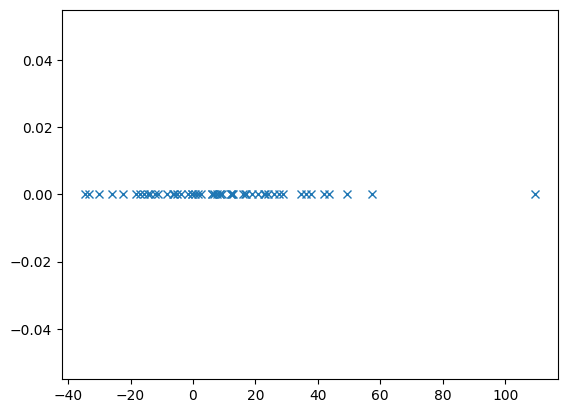

In [17]:
long_df = df[df['Position (Long = 1, Short = -1)'] == 1]
long_total_pnl = long_df['pnl'].sum()
print(long_total_pnl)
long_total_spy_pnl = long_df['spy_pnl'].sum()
print(long_total_spy_pnl)

print(long_df['annualized_pnl'].mean())
print(long_df['annualized_spy_pnl'].mean())

print(long_df['annualized_pnl'].median())
print(long_df['annualized_spy_pnl'].median())

plt.plot(list(long_df['pnl']), np.zeros_like(list(long_df['pnl'])), 'x') 

# type(long_df['pnl'])

-112.76353379119286
-283.2645149056811
-1646.7538910920239
-1306.749310704032
-9.712120225267036
-24.567679533351427


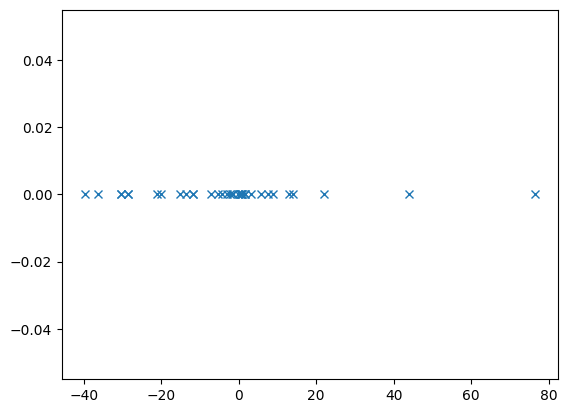

In [29]:
short_df = df[df['Position (Long = 1, Short = -1)'] == -1]
short_total_pnl = short_df['pnl'].sum()
print(short_total_pnl)
short_total_spy_pnl = short_df['spy_pnl'].sum()
print(short_total_spy_pnl)


print(short_df['annualized_pnl'].sum())
print(short_df['annualized_spy_pnl'].sum())

print(short_df['annualized_pnl'].median())
print(short_df['annualized_spy_pnl'].median())

plt.plot(list(short_df['pnl']), np.zeros_like(list(short_df['pnl'])), 'x') 

# type(long_df['pnl'])

In [19]:
len(short_df)

36

In [20]:
total_pnl = df['pnl'].sum()
print(total_pnl)
total_spy_pnl = df['spy_pnl'].sum()
print(total_spy_pnl)

366.09691816692543
282.2808854611035
